In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import os
from fastai import *
from fastai.vision import *

In [9]:
import fastai
from PIL import Image
print("The version of FastAI being used is: ", fastai.__version__)

The version of FastAI being used is:  2.7.12


In [10]:
from pathlib import Path

In [11]:
import cv2
from google.colab.patches import cv2_imshow

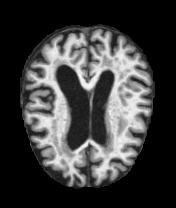

(208, 176, 3)


In [12]:
TEST_IMAGE = "/content/drive/MyDrive/Alzheimer_s Dataset/train/MildDemented/mildDem715.jpg"
im = cv2.imread(TEST_IMAGE)
cv2_imshow(im)
print(im.shape)

In [13]:
PATH = "/content/drive/MyDrive/Alzheimer_s Dataset"

In [14]:
import torch
import fastai
from fastai.tabular.all import *
from fastai.text.all import *
from fastai.vision.all import *
# from fastai.medical.imaging import *
from fastai import *
from fastai.vision import *

In [15]:
data = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=parent_label,
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms())
dls = data.dataloaders(PATH, bs=64)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

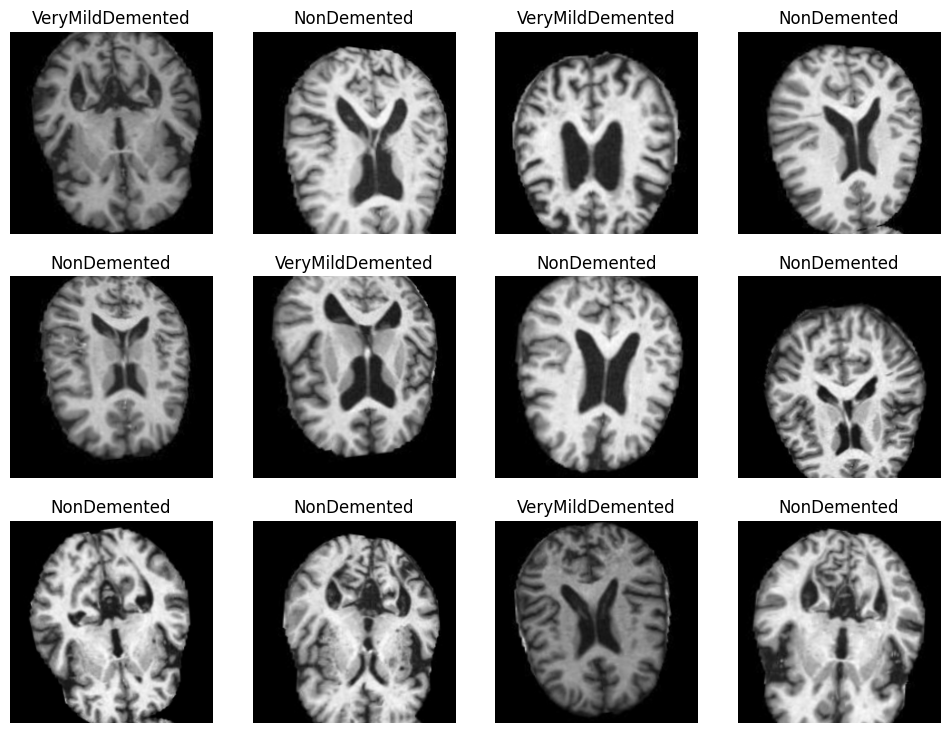

In [16]:
dls.show_batch(max_n=12, nrows=3)
dls.vocab

In [17]:
import torch.nn as nn

In [18]:
learn2 = cnn_learner(dls, models.vgg16_bn, metrics=accuracy)
learn2.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313

epoch,train_loss,valid_loss,accuracy,time
0,1.773350,1.137623,0.568413,11:53


epoch,train_loss,valid_loss,accuracy,time
0,1.314946,0.905058,0.632525,01:34
1,1.094601,0.804077,0.669273,01:30
2,0.888930,0.720888,0.695856,01:29
3,0.669283,0.682109,0.730258,01:30
4,0.492847,0.669982,0.745895,01:31
5,0.358574,0.421206,0.837373,01:30
6,0.274525,0.390488,0.845192,01:29
7,0.196673,0.361108,0.860047,01:31
8,0.151845,0.297987,0.883503,01:30
9,0.140099,0.300456,0.874902,01:30


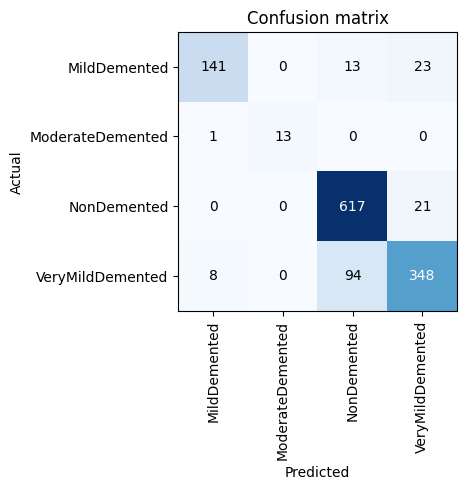

In [19]:
interp = ClassificationInterpretation.from_learner(learn2)
interp.plot_confusion_matrix()

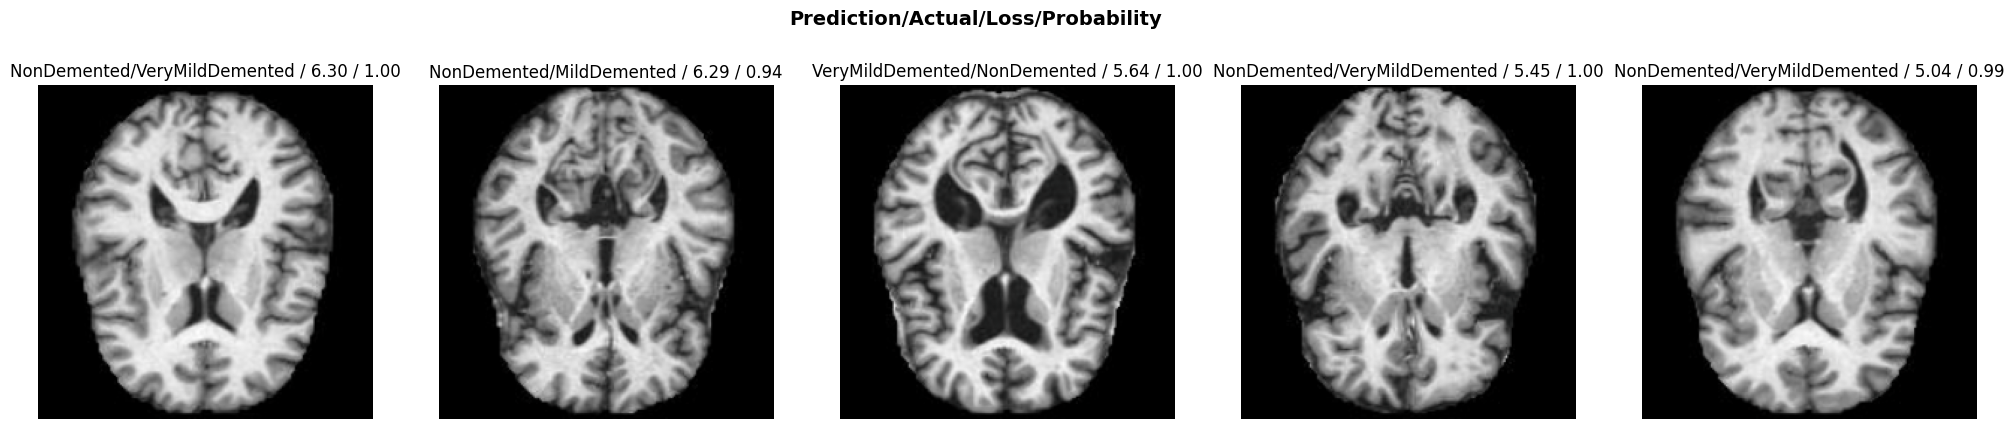

In [20]:
interp.plot_top_losses(5, nrows=1, figsize = (25,5))

In [21]:
from fastai.vision.widgets import *
btn_run = widgets.Button(description='Classify')

In [22]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn2.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [23]:
btn_upload = widgets.FileUpload()

out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [24]:
VBox([widgets.Label('Select a X-ray'),btn_upload, btn_run, out_pl, lbl_pred])

In [25]:
learn2.save("final")

Path('models/final.pth')